<a href="https://colab.research.google.com/github/utsusemi82/Self-Learn-Assessment/blob/master/Exploring_Global_Poverty_Levels(WIH2001).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**What are the trends in poverty rates globally and within specific countries over the years covered by the dataset in the next 10 years? (prediction)**


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/DA dataset cleaned.csv')
#df = pd.read_csv('/DA dataset cleaned.csv')
df.head(20)

,Entity,Code,Year,$30.00 per day - share of population below poverty line
0,Albania,ALB,1981,99.91247
1,Albania,ALB,1982,99.91247
2,Albania,ALB,1983,99.91247
3,Albania,ALB,1984,99.91247
4,Albania,ALB,1985,99.91247
5,Albania,ALB,1986,99.91247
6,Albania,ALB,1987,99.91247
7,Albania,ALB,1988,99.91247
8,Albania,ALB,1989,99.91247
9,Albania,ALB,1990,99.91247


In [ ]:
df.describe()

,Year,$30.00 per day - share of population below poverty line
count,6561.000000,6561.000000
mean,2000.173754,87.348273
std,11.210526,23.335660
min,1981.000000,0.000000
25%,1991.000000,90.374430
50%,2000.000000,98.368210
75%,2010.000000,99.780190
max,2019.000000,99.990000


In [ ]:
#list the column of dataset and examine missing values
col = list(df.columns)
col
print(df.isnull().mean())

Entity                                                     0.000000
Code                                                       0.025301
Year                                                       0.000000
$30.00 per day - share of population below poverty line    0.000000
dtype: float64


In [ ]:
# Build linear regression model using Year as predictors/input feature, Poverty rates as target variable
X = df['Year'].values.reshape(-1,1)
y = df['$30.00 per day - share of population below poverty line'].values

#Initialise and fit model
lr = LinearRegression()
model = lr.fit(X, y)

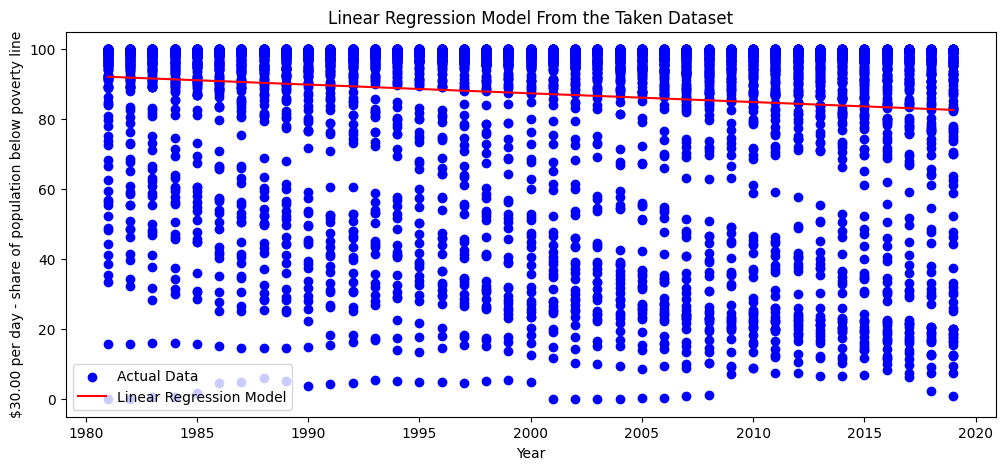

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.scatter(X, y, color='blue', label='Actual Data')

plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Linear Regression Model From the Taken Dataset')
plt.legend()
plt.show()


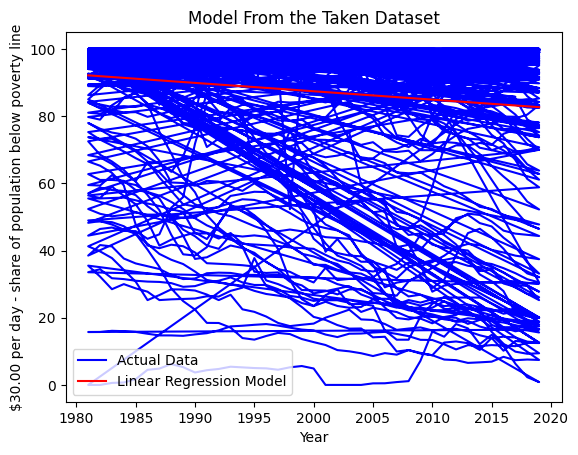

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, color='blue', label='Actual Data')

plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Model From the Taken Dataset')
plt.legend()
plt.show()


Since

alpha = 585.6321602348199
betas = [-0.2491203]


##Yₑ = α + β X

Therefore,

Y = 585.6321602338199 + [-0.2491203]X

while

Y = $30.00 per day - share of population below poverty line
, X = Year

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 585.6321602348199
betas = [-0.2491203]


In [ ]:
#Forecast for next 10 years
#Create a list of future years that want to predict the rates

future_years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]
future_X = pd.DataFrame({'Year':future_years})
predicted_rates = lr.predict(future_X.values)

In [ ]:
for year, rate in zip(future_years, predicted_rates):
    print(f"Predicted poverty rate for {year}: {rate}")


Predicted poverty rate for 2020: 82.40915273353505
Predicted poverty rate for 2021: 82.16003243279181
Predicted poverty rate for 2022: 81.91091213204862
Predicted poverty rate for 2023: 81.66179183130544
Predicted poverty rate for 2024: 81.41267153056219
Predicted poverty rate for 2025: 81.163551229819
Predicted poverty rate for 2026: 80.91443092907576
Predicted poverty rate for 2027: 80.66531062833258
Predicted poverty rate for 2028: 80.41619032758933
Predicted poverty rate for 2029: 80.16707002684615


In [ ]:
#To predict the poverty rates globally and within specific countries over the years covered by the dataset in the next 10 years

new_X = [[2029]]
new_Y = model.predict(new_X)
print(new_Y)


[80.16707003]


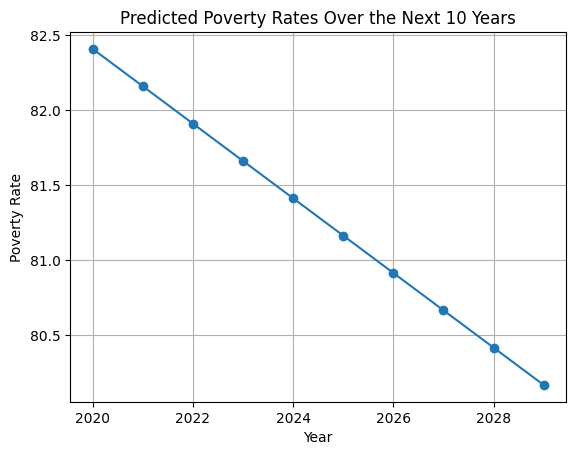

In [ ]:
# Plot the predicted poverty rates
plt.plot(future_years, predicted_rates, marker='o')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.title('Predicted Poverty Rates Over the Next 10 Years')
plt.grid(True)
plt.show()

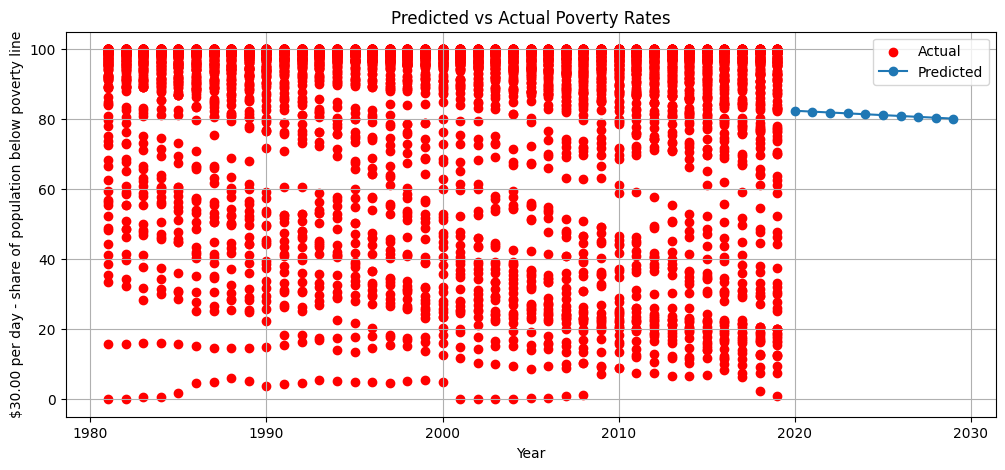

In [ ]:

# Plot the predicted poverty rates and actual data
plt.figure(figsize=(12, 5))
plt.scatter(X, y, color='red', label='Actual')
plt.plot(future_years, predicted_rates, marker='o', label='Predicted')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Predicted vs Actual Poverty Rates')
plt.legend()
plt.grid(True)
plt.show()

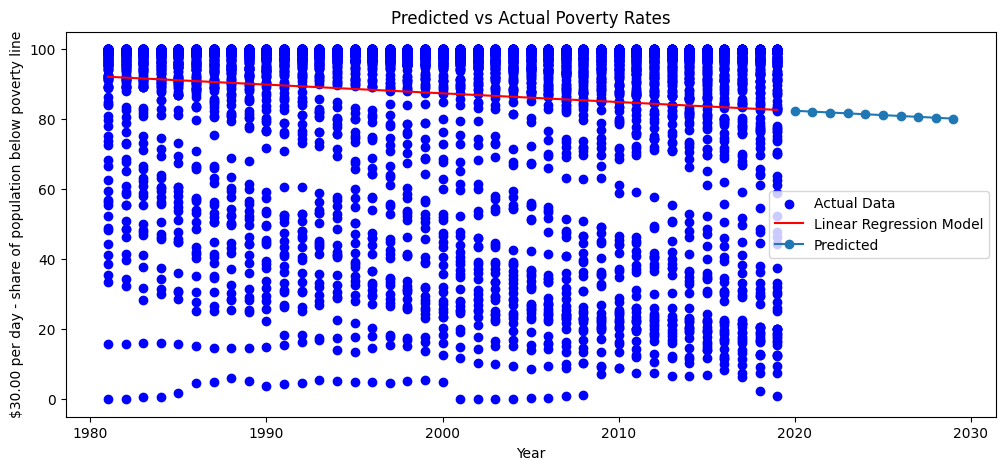

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(X, y, color='blue', label='Actual Data')

plt.plot(X, model.predict(X), color='red', label='Linear Regression Model')
plt.plot(future_years, predicted_rates, marker='o', label='Predicted')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Predicted vs Actual Poverty Rates')
plt.legend()
plt.show()

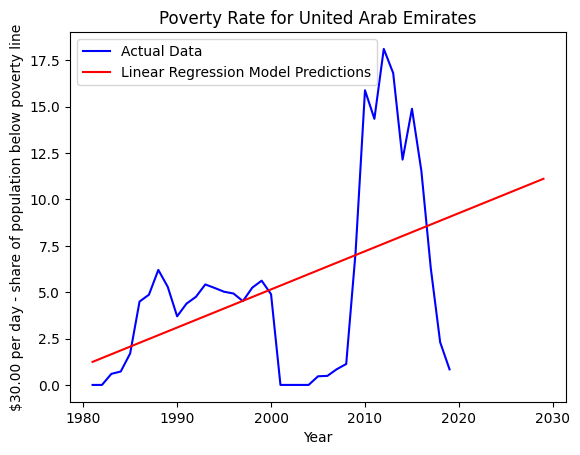

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for the United Arab Emirates
uae_data = df[df['Entity'] == 'United Arab Emirates']

# Build linear regression model using Year as predictors/input feature, Poverty rates as target variable
X = uae_data['Year'].values.reshape(-1, 1)
y = uae_data['$30.00 per day - share of population below poverty line'].values

# Initialize and fit the linear regression model
lr = LinearRegression()
model = lr.fit(X, y)

# Generate x-values for the next 10 years
future_years = np.arange(uae_data['Year'].min(), uae_data['Year'].max() + 11).reshape(-1, 1)

# Predict poverty rates for the next 10 years
future_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.plot(uae_data['Year'], uae_data['$30.00 per day - share of population below poverty line'], color='blue', label='Actual Data')
plt.plot(future_years, future_predictions, color='red', label='Linear Regression Model Predictions')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Poverty Rate for United Arab Emirates')
plt.legend()
plt.show()


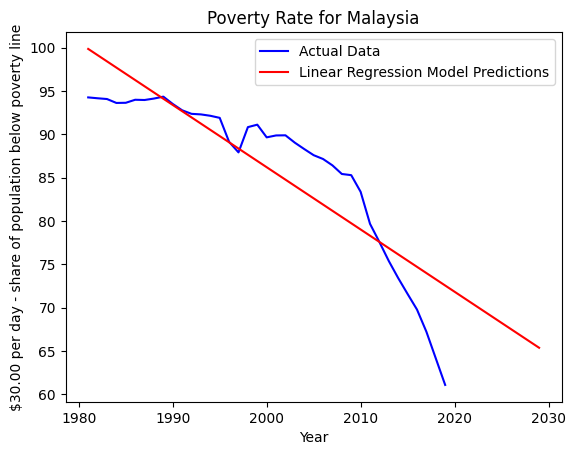

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for Malaysia
malaysia_data = df[df['Entity'] == 'Malaysia']

# Build linear regression model using Year as predictors/input feature, Poverty rates as target variable
X = malaysia_data['Year'].values.reshape(-1, 1)
y = malaysia_data['$30.00 per day - share of population below poverty line'].values

# Initialize and fit the linear regression model
lr = LinearRegression()
model = lr.fit(X, y)

# Generate x-values for the next 10 years
future_years = np.arange(malaysia_data['Year'].min(), malaysia_data['Year'].max() + 11).reshape(-1, 1)

# Predict poverty rates for the next 10 years
future_predictions = model.predict(future_years)

# Plot the actual data and predictions
plt.plot(malaysia_data['Year'], malaysia_data['$30.00 per day - share of population below poverty line'], color='blue', label='Actual Data')
plt.plot(future_years, future_predictions, color='red', label='Linear Regression Model Predictions')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Poverty Rate for Malaysia')
plt.legend()
plt.show()


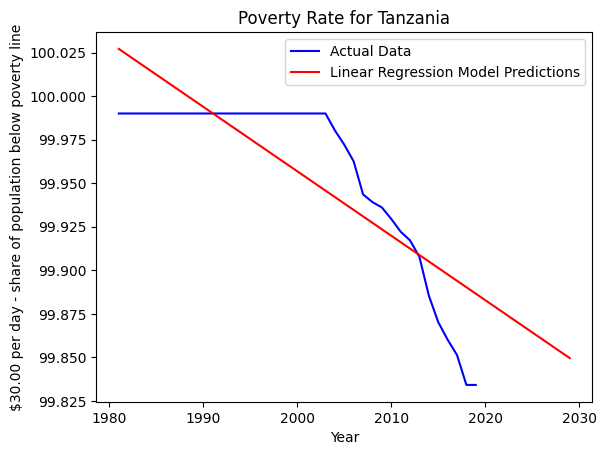

In [ ]:

Tanzania_data = df[df['Entity'] == 'Tanzania']

g = Tanzania_data['Year'].values.reshape(-1, 1)
h = Tanzania_data['$30.00 per day - share of population below poverty line'].values

lr = LinearRegression()
model = lr.fit(g, h)

future_years = np.arange(Tanzania_data['Year'].min(), Tanzania_data['Year'].max() + 11).reshape(-1, 1)

future_predictions = model.predict(future_years)

plt.plot(Tanzania_data['Year'], Tanzania_data['$30.00 per day - share of population below poverty line'], color='blue', label='Actual Data')
plt.plot(future_years, future_predictions, color='red', label='Linear Regression Model Predictions')

plt.xlabel('Year')
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('Poverty Rate for Tanzania')
plt.legend()
plt.show()


Using the mean poverty rate for each country over the years as the country's poverty rate to perform regression.

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
country = df['Entity']

In [ ]:
#Calc the mean poverty rate of each country over the years
mean_data = df.groupby(country)['$30.00 per day - share of population below poverty line'].mean().reset_index()
mean_data.head(20)

,Entity,$30.00 per day - share of population below poverty line
0,Albania,99.622814
1,Algeria,99.266741
2,Angola,99.114168
3,Armenia,98.480291
4,Australia,40.055055
5,Austria,24.694961
6,Azerbaijan,93.329459
7,Bangladesh,99.919939
8,Belarus,96.868148
9,Belgium,35.740491


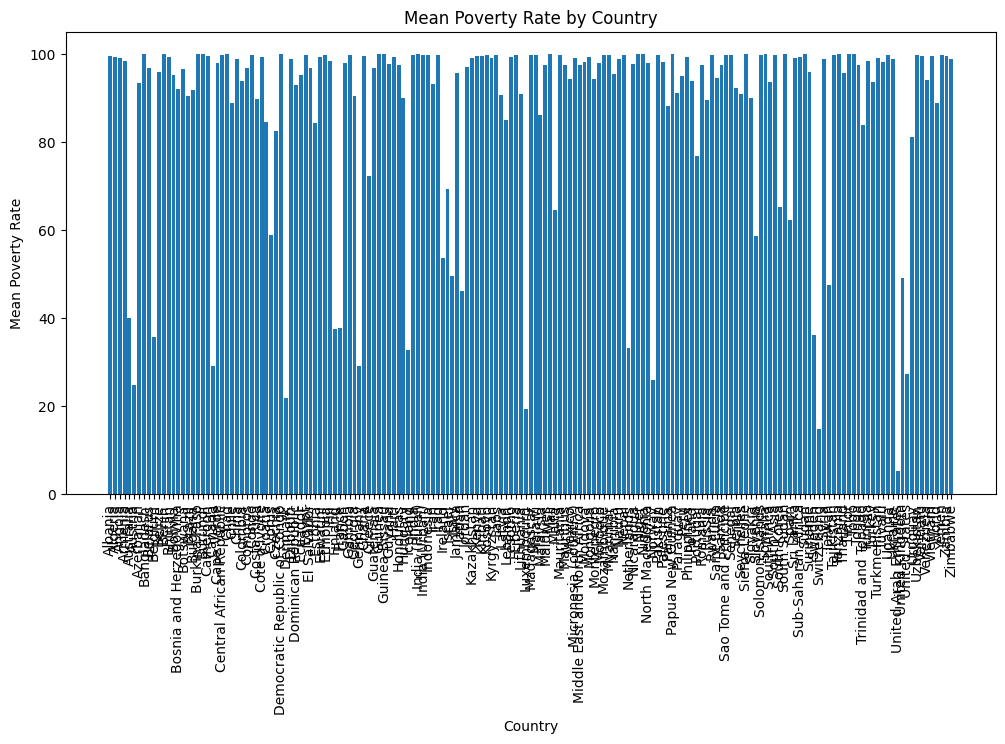

In [ ]:
# Plot the graph of mean poverty rate by each country
plt.figure(figsize=(12, 6))
plt.bar(mean_data['Entity'], mean_data['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by Country')
plt.xticks(rotation=90)
plt.show()

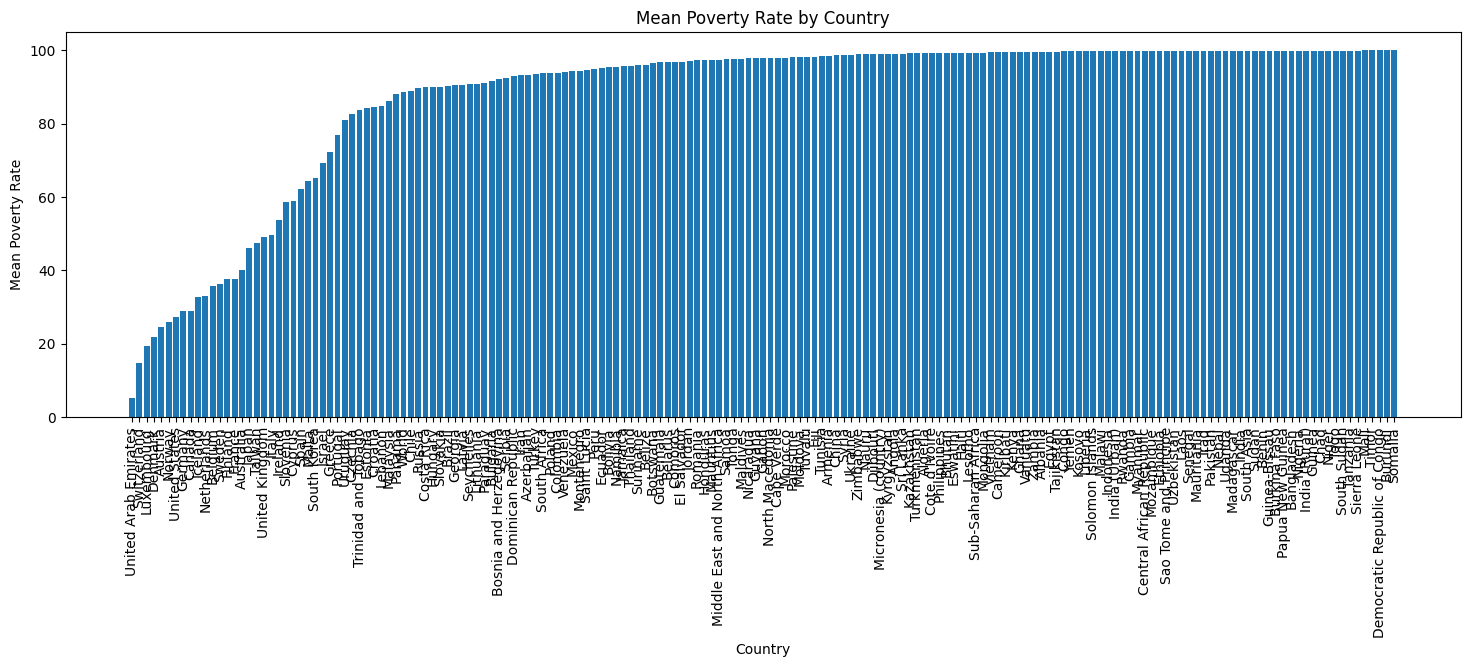

In [ ]:
sorted_data = mean_data.sort_values('$30.00 per day - share of population below poverty line')

# Create the bar chart with the sorted data
plt.figure(figsize=(18, 5))
plt.bar(sorted_data['Entity'], sorted_data['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by Country')
plt.xticks(rotation=90)
plt.show()

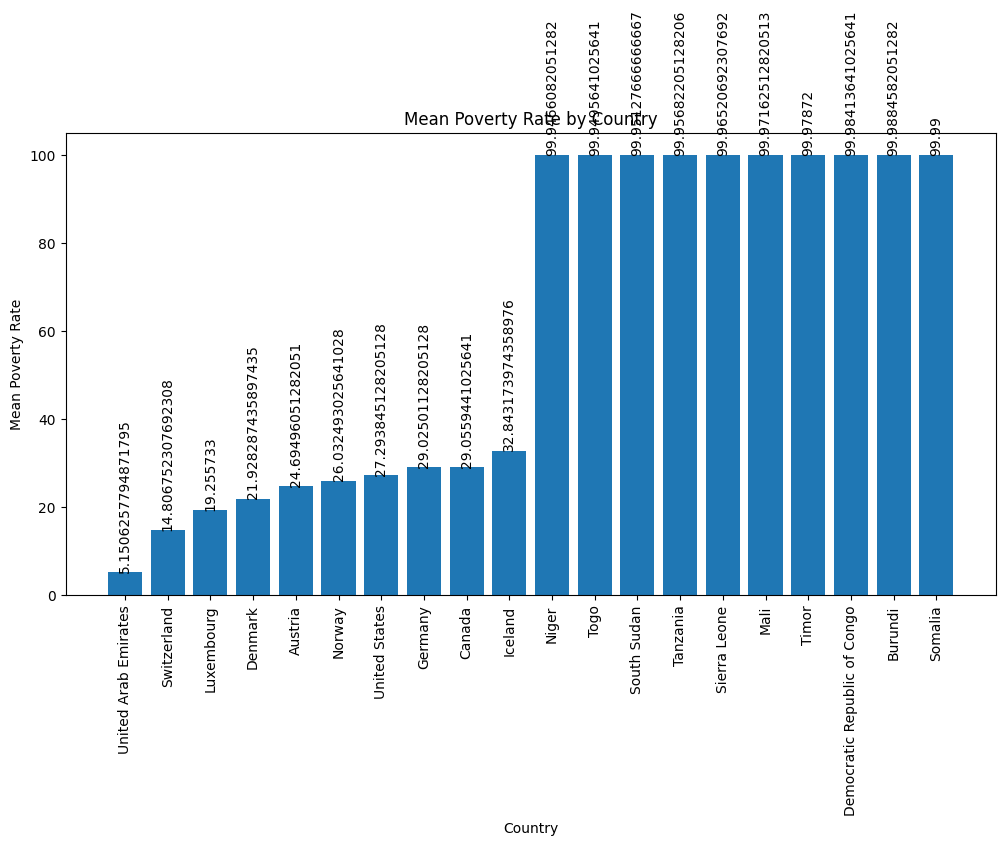

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

sorted_data = mean_data.sort_values('$30.00 per day - share of population below poverty line')

# Select the top 10 and bottom 10 countries
top_10 = sorted_data.tail(10)  # Change to .head(10) if you want the top 10 instead
bottom_10 = sorted_data.head(10)  # Change to .tail(10) if you want the bottom 10 instead

# Concatenate the top and bottom dataframes
selected_data = pd.concat([bottom_10, top_10])

# Create the bar chart with the selected data
plt.figure(figsize=(12, 6))
plt.bar(selected_data['Entity'], selected_data['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by Country')
plt.xticks(rotation=90)

# Display the numbers on each bar
for i, value in enumerate(selected_data['$30.00 per day - share of population below poverty line']):
    plt.text(i, value, str(value), ha='center', va='bottom',rotation=90)

plt.show()


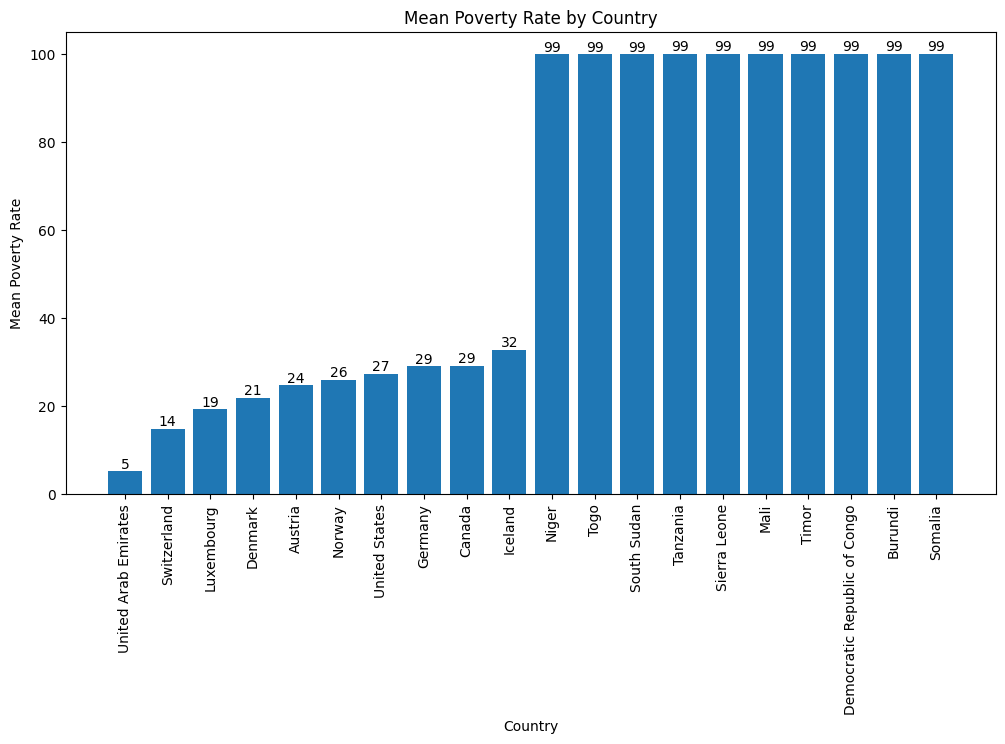

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

sorted_data = mean_data.sort_values('$30.00 per day - share of population below poverty line')

# Select the top 10 and bottom 10 countries
top_10 = sorted_data.tail(10)  # Change to .head(10) if you want the top 10 instead
bottom_10 = sorted_data.head(10)  # Change to .tail(10) if you want the bottom 10 instead

# Concatenate the top and bottom dataframes
selected_data = pd.concat([bottom_10, top_10])

# Create the bar chart with the selected data
plt.figure(figsize=(12, 6))
plt.bar(selected_data['Entity'], selected_data['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by Country')
plt.xticks(rotation=90)

# Display the numbers on each bar without decimals
for i, value in enumerate(selected_data['$30.00 per day - share of population below poverty line']):
    plt.text(i, value, f'{int(value)}', ha='center', va='bottom')

plt.show()


In [ ]:
#sort and filter the top 10 countries with highest poverty rate
new_data = mean_data.sort_values(by = ['$30.00 per day - share of population below poverty line'],ascending=False)
poorestCountry = new_data.head(10)
poorestCountry

,Entity,$30.00 per day - share of population below poverty line
134,Somalia,99.990000
19,Burundi,99.988458
35,Democratic Republic of Congo,99.984136
151,Timor,99.978720
90,Mali,99.971625
130,Sierra Leone,99.965207
149,Tanzania,99.956822
138,South Sudan,99.951277
152,Togo,99.949564
108,Niger,99.946608


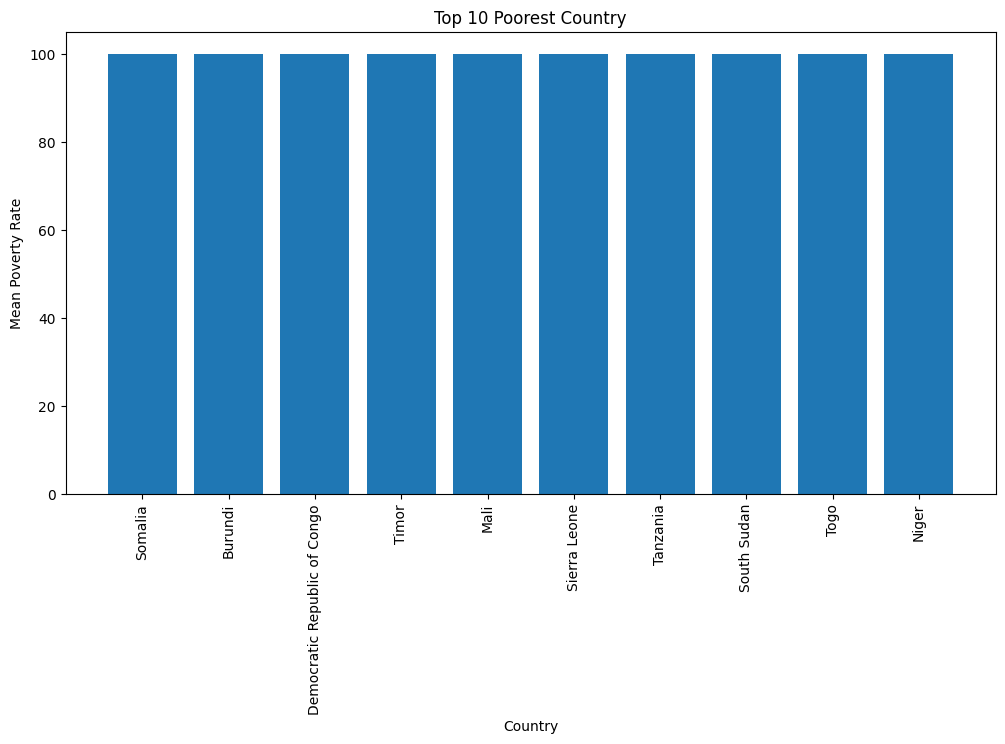

In [ ]:
# Plot the graph of mean poverty rate by each country
plt.figure(figsize=(12, 6))
plt.bar(poorestCountry['Entity'], poorestCountry['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Top 10 Poorest Country')
plt.xticks(rotation=90)
plt.show()

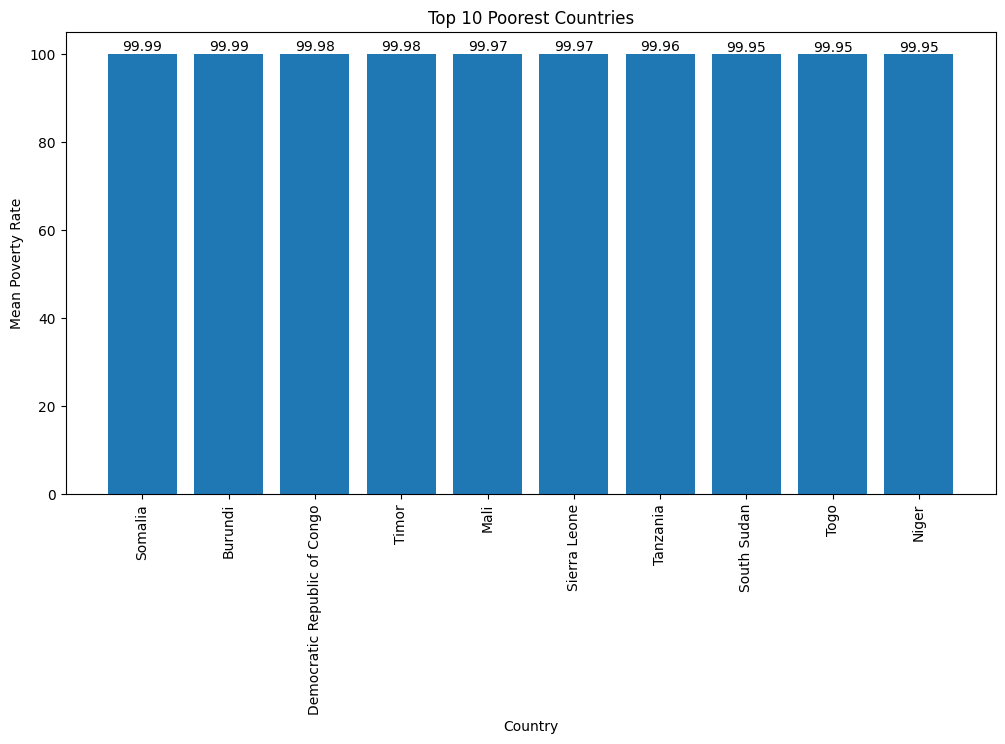

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(poorestCountry['Entity'], poorestCountry['$30.00 per day - share of population below poverty line'])
plt.xlabel('Country')
plt.ylabel('Mean Poverty Rate')
plt.title('Top 10 Poorest Countries')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


In [ ]:
new_data2 = mean_data.sort_values(by = ['$30.00 per day - share of population below poverty line'],ascending=True)
richestCountry = new_data2.head(10)
richestCountry

,Entity,$30.00 per day - share of population below poverty line
161,United Arab Emirates,5.150626
145,Switzerland,14.806752
85,Luxembourg,19.255733
36,Denmark,21.928287
5,Austria,24.694961
111,Norway,26.032493
163,United States,27.293845
51,Germany,29.025011
21,Canada,29.055944
61,Iceland,32.843174


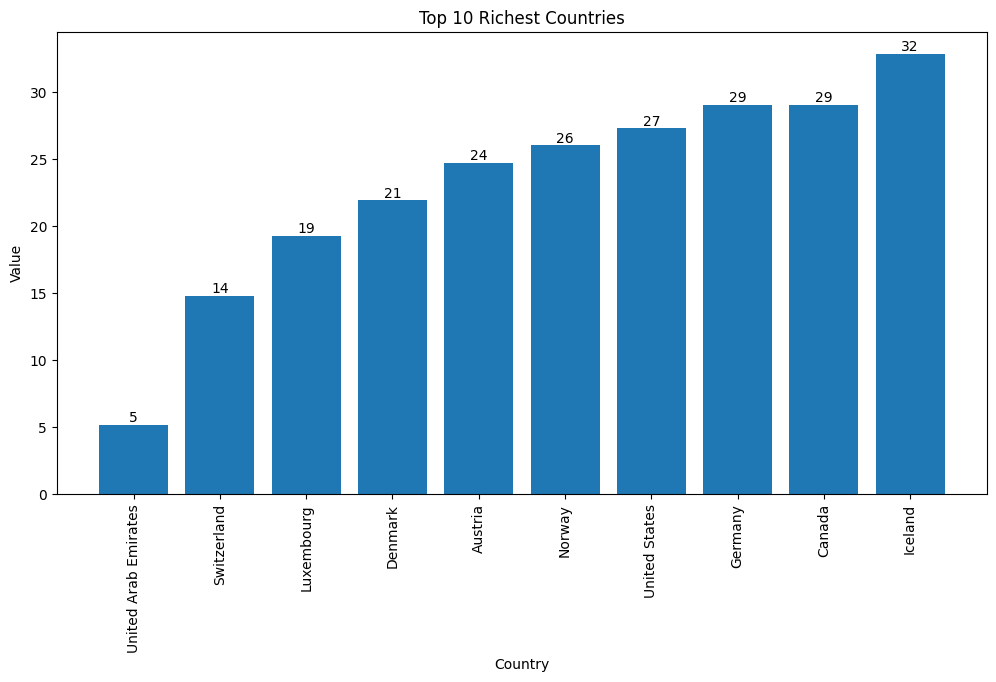

In [ ]:
import matplotlib.pyplot as plt

data_column = richestCountry['$30.00 per day - share of population below poverty line']
country_labels = richestCountry['Entity']

plt.figure(figsize=(12, 6))
bars = plt.bar(country_labels, data_column)

plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Top 10 Richest Countries')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bars)

plt.show()


In [ ]:
# Plot the graph based on year
# Calculate the mean poverty rate for each country and year
plt.figure(figsize=(10, 6))
mean_data = df.groupby(['Entity', 'Year'])['$30.00 per day - share of population below poverty line'].mean().reset_index()

countries = mean_data['Entity'].unique()

for country in countries:
    country_data = mean_data[mean_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['$30.00 per day - share of population below poverty line'], label=country)

plt.xlabel('Year')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by Country')
plt.legend()
plt.grid(True)